# Se importan las librerías

In [1]:
import os
import pandas as pd
import numpy as np
import pickle
import joblib

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, ElasticNet

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.ensemble import (RandomForestRegressor, AdaBoostRegressor,
                             GradientBoostingRegressor, ExtraTreesRegressor)

from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                    StratifiedKFold)


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

ruta_actual = os.getcwd()
## Funciones
os.chdir('../')  # Establecemos el directorio de trabajo
from utils import funciones as fn
from utils import listas as ls
os.chdir(ruta_actual)

In [2]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

# Se carga el csv con los datos preparados para el modelo

In [3]:
ruta_Train_clean = f'../data/clean/Train_clean.csv'
df = pd.read_csv(ruta_Train_clean,index_col=0)
df

,Precio,Combustible,Anyo,Kilometros,Potencia,Vendedor_profesional,Comunidad_Autonoma,Cluster_Marca,Cluster_Modelo
1,14490,Diésel,2016.0,93142,116.0,True,Catalunya,Premium,compacto_pequeno
2,1800,Diésel,2002.0,122000,90.0,True,Comunidad_Valenciana,Standard,compacto_grande
3,22800,Gasolina,2018.0,29060,205.0,True,País_Vasco,Standard,compacto_grande
4,25900,Gasolina,2011.0,34670,184.0,True,Comunidad_Valenciana,Premium,coupe_grande
5,29418,Diésel,2017.0,47100,194.0,True,Comunidad_Valenciana,Premium,sedan_grande
...,...,...,...,...,...,...,...,...,...
39784,10990,Diésel,2007.0,189000,231.0,False,Cantabria,Premium,sedan_grande
39785,26000,Diésel,2019.0,17741,120.0,True,Galicia,Standard,otro
39786,350,Gasolina,1993.0,189318,50.0,False,Andalucía,Standard,compacto_pequeno
39787,13500,Gasolina,2017.0,33500,115.0,True,Catalunya,Standard,suv_pequeno


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35669 entries, 1 to 39788
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Precio                35669 non-null  int64  
 1   Combustible           35669 non-null  object 
 2   Anyo                  35669 non-null  float64
 3   Kilometros            35669 non-null  int64  
 4   Potencia              35669 non-null  float64
 5   Vendedor_profesional  35669 non-null  bool   
 6   Comunidad_Autonoma    35669 non-null  object 
 7   Cluster_Marca         35669 non-null  object 
 8   Cluster_Modelo        35669 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 2.5+ MB


In [5]:
df

,Precio,Combustible,Anyo,Kilometros,Potencia,Vendedor_profesional,Comunidad_Autonoma,Cluster_Marca,Cluster_Modelo
1,14490,Diésel,2016.0,93142,116.0,True,Catalunya,Premium,compacto_pequeno
2,1800,Diésel,2002.0,122000,90.0,True,Comunidad_Valenciana,Standard,compacto_grande
3,22800,Gasolina,2018.0,29060,205.0,True,País_Vasco,Standard,compacto_grande
4,25900,Gasolina,2011.0,34670,184.0,True,Comunidad_Valenciana,Premium,coupe_grande
5,29418,Diésel,2017.0,47100,194.0,True,Comunidad_Valenciana,Premium,sedan_grande
...,...,...,...,...,...,...,...,...,...
39784,10990,Diésel,2007.0,189000,231.0,False,Cantabria,Premium,sedan_grande
39785,26000,Diésel,2019.0,17741,120.0,True,Galicia,Standard,otro
39786,350,Gasolina,1993.0,189318,50.0,False,Andalucía,Standard,compacto_pequeno
39787,13500,Gasolina,2017.0,33500,115.0,True,Catalunya,Standard,suv_pequeno


### Se separa la variable target del df con los datos

In [6]:
X = df.drop(columns=['Precio'])
y = df['Precio']

In [7]:
X=X.reset_index(drop=True)
X

,Combustible,Anyo,Kilometros,Potencia,Vendedor_profesional,Comunidad_Autonoma,Cluster_Marca,Cluster_Modelo
0,Diésel,2016.0,93142,116.0,True,Catalunya,Premium,compacto_pequeno
1,Diésel,2002.0,122000,90.0,True,Comunidad_Valenciana,Standard,compacto_grande
2,Gasolina,2018.0,29060,205.0,True,País_Vasco,Standard,compacto_grande
3,Gasolina,2011.0,34670,184.0,True,Comunidad_Valenciana,Premium,coupe_grande
4,Diésel,2017.0,47100,194.0,True,Comunidad_Valenciana,Premium,sedan_grande
...,...,...,...,...,...,...,...,...
35664,Diésel,2007.0,189000,231.0,False,Cantabria,Premium,sedan_grande
35665,Diésel,2019.0,17741,120.0,True,Galicia,Standard,otro
35666,Gasolina,1993.0,189318,50.0,False,Andalucía,Standard,compacto_pequeno
35667,Gasolina,2017.0,33500,115.0,True,Catalunya,Standard,suv_pequeno


In [8]:
y=y.reset_index(drop=True)
y

0        14490
1         1800
2        22800
3        25900
4        29418
         ...  
35664    10990
35665    26000
35666      350
35667    13500
35668     2650
Name: Precio, Length: 35669, dtype: int64

# Transformaciones sobre las columnas del df

### Se definen las operaciones que se van a realizar sobre las columnas

In [9]:
var_numericas = list(X.select_dtypes(exclude=['object','boolean']))
#the textual transformation pipeline
var_cat = list(X.select_dtypes(exclude=['int64','float64']))
#setting the order of the two pipelines
pipeline_train = ColumnTransformer([
        ("numeric", StandardScaler() , var_numericas),
        ("text", OneHotEncoder(), var_cat),
    ])

In [10]:
pipeline_train

ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                 ['Anyo', 'Kilometros', 'Potencia']),
                                ('text', OneHotEncoder(),
                                 ['Combustible', 'Vendedor_profesional',
                                  'Comunidad_Autonoma', 'Cluster_Marca',
                                  'Cluster_Modelo'])])

### Se entrena el pipeline

In [11]:
pipeline_train.fit(X)
X_trans=pipeline_train.transform(X).toarray()

In [12]:
X_escalado = pd.DataFrame(X_trans, columns=pipeline_train.get_feature_names_out())

In [13]:
X_escalado

,numeric__Anyo,numeric__Kilometros,numeric__Potencia,text__Combustible_Diésel,text__Combustible_Eléctrico,text__Combustible_Gas licuado (GLP),text__Combustible_Gas natural (CNG),text__Combustible_Gasolina,text__Combustible_Híbrido,text__Combustible_Híbrido enchufable,...,text__Cluster_Modelo_compacto_pequeno,text__Cluster_Modelo_coupe_grande,text__Cluster_Modelo_coupe_pequeno,text__Cluster_Modelo_furgon_pasajero,text__Cluster_Modelo_furgon_trabajo,text__Cluster_Modelo_otro,text__Cluster_Modelo_sedan_grande,text__Cluster_Modelo_sedan_pequeno,text__Cluster_Modelo_suv_grande,text__Cluster_Modelo_suv_pequeno
0,0.559955,-0.240022,-0.350811,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.654176,0.094079,-1.071417,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.876260,-0.981926,2.115881,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.230806,-0.916977,1.533853,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.718107,-0.773070,1.811009,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35664,-0.863415,0.869765,2.836488,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35665,1.034412,-1.112971,-0.239948,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
35666,-3.077546,0.873447,-2.180043,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35667,0.718107,-0.930523,-0.378526,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
y

0        14490
1         1800
2        22800
3        25900
4        29418
         ...  
35664    10990
35665    26000
35666      350
35667    13500
35668     2650
Name: Precio, Length: 35669, dtype: int64

### Se guardan los datos y el pipeline para poder utilizarlo posteriormente


In [15]:
X_escalado.to_csv('../data/clean/X_escalado.csv')
y.to_csv('../data/clean/y.csv')

In [16]:
pickle.dump(pipeline_train, open('../model/pipeline_train.pkl', 'wb'))

# Evaluación de los modelos

Se realiza la evaluación de los modelos de 3 maneras distintas:
- Sin realizar ninguna operación sobre los datos ya preparados
- Realizando PCA sobre los datos
- Realizando KMeans

Para la evaluación de los modelo, existe una lista con todos los modelos (en la carpeta `utils`) a probar y sobre esa lista se realiza un cross_val_score con metrica `mean_squared_error` para determinar cuales son los mejores modelos

#### Primero se evaluan los modelos sin realizar operaciones sobre ellos.

             MSE           STD           MODELOS
1   5.456168e+06  2.350401e+05           XGBoost
5   5.728298e+06  2.395555e+05      RandomForest
3   5.773746e+06  2.749262e+05          AdaBoost
6   5.814430e+06  3.323219e+05        ExtraTrees
8   7.196682e+06  2.218030e+05  GradientBoosting
2   8.982623e+06  3.532601e+05       KNeighboors
4   1.009254e+07  6.102455e+05      DecisionTree
9   1.522298e+07  1.893664e+05             Lasso
0   1.528090e+07  2.246810e+05            Linear
10  2.085350e+07  3.797378e+05        ElasticNet
7   5.645440e+07  1.274584e+06               SVR


<AxesSubplot:title={'center':'CV MSE'}, xlabel='MSE', ylabel='MODELOS'>

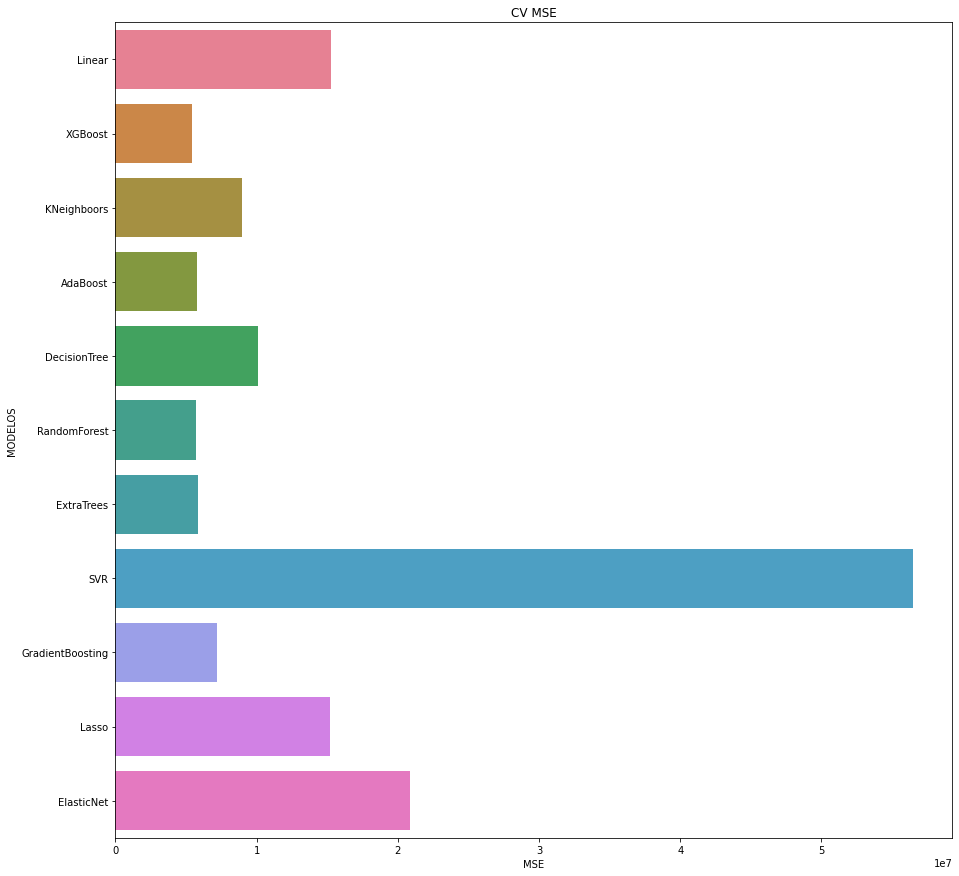

In [17]:
K_fold = StratifiedKFold(n_splits=10) #divisiones que se harán en cross_val_score

resultados_cv_MSE = [] # resultado cross validation 
media_cv_MSE = [] # valor de la media de cross validation
std_cv = [] # std cross validation 

# Se crea una lista con los datos de la metrica por cada modelo
for model in ls.lista_modelos : 
    resultados_cv_MSE.append(cross_val_score(model, X_escalado, y, 
            scoring = "neg_mean_squared_error", cv = K_fold, n_jobs=-1))

# se realiza la media de cada metrica por cada modelo
for resultado in resultados_cv_MSE: 
    media_cv_MSE.append(abs(resultado.mean()))
    std_cv.append(resultado.std())

# se geenra un data frame con las medias calculadas anteriormente
tabla_resultados = pd.DataFrame(
    {
        "MSE":media_cv_MSE,
        "STD": std_cv,
        "MODELOS":[
                     "Linear",
                     "XGBoost",
                     "KNeighboors",
                     "AdaBoost", 
                     "DecisionTree",   
                     "RandomForest",
                     "ExtraTrees",
                     "SVR",
                     "GradientBoosting",
                     "Lasso",
                     "ElasticNet"]
    },columns=['MSE','STD','MODELOS'])

# se muestran los resultados en tabla y en gráfica
print(tabla_resultados.sort_values(by=['MSE'], ascending=True))
plt.figure(figsize=(15,15), facecolor='w')
plt.xlabel("Mean Squared Error")
plt.title("CV MSE")
sns.barplot("MSE","MODELOS", data = tabla_resultados,
                palette="husl", orient = "h")

En la tabla y en la gráfica se puede ver que los modelos `XGBoost, AsaBoost y RandomForest` son los que mejor metrica tienen, estos modelos se emplearán en la optimización de parametros que se hará en el siguiente paso

# Modelo con PCA

In [18]:
pca = PCA()
X_pca = pca.fit_transform(X_escalado)

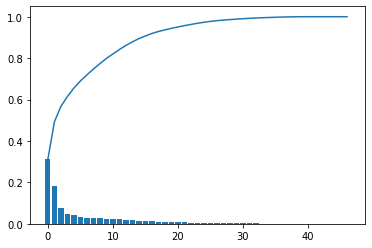

In [19]:
var_acum = np.cumsum(pca.explained_variance_ratio_)
plt.bar(range(len(var_acum)), pca.explained_variance_ratio_)
plt.plot(range(len(var_acum)), var_acum)
plt.show()

Se identifica el número de componenetes con los que se explca más del 90% de variaza.

In [20]:
for i in range(len(pca.explained_variance_ratio_)):
    if var_acum[i]>0.9:
        componentes = i
        break

In [21]:
componentes

15

Se realiza de nuevo el PCA en este caso con 15 componentes

In [22]:
pca = PCA(n_components=15) 
X_pca = pca.fit_transform(X_escalado)

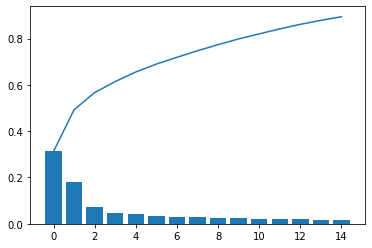

In [23]:
var_acum = np.cumsum(pca.explained_variance_ratio_)
plt.bar(range(len(var_acum)), pca.explained_variance_ratio_)
plt.plot(range(len(var_acum)), var_acum)
plt.show()

Se genera un df con los datos obtenidos de PCA

In [24]:
X_pca_df = pd.DataFrame(X_pca,columns=["Componente_"+str(i) for i in range(1,16)])

Se realizan los mismos pasos en el apartado anterior sin PCA

             MSE           STD           MODELOS
6   6.231986e+06  2.710784e+05        ExtraTrees
5   6.416201e+06  3.185341e+05      RandomForest
3   6.649285e+06  3.064689e+05          AdaBoost
1   6.662796e+06  2.638618e+05           XGBoost
2   8.078142e+06  3.460215e+05       KNeighboors
8   8.193556e+06  2.602508e+05  GradientBoosting
4   1.260786e+07  5.660086e+05      DecisionTree
9   1.635725e+07  2.393639e+05             Lasso
0   1.635725e+07  2.397035e+05            Linear
10  2.100838e+07  3.788185e+05        ElasticNet
7   5.527702e+07  1.284759e+06               SVR


<AxesSubplot:title={'center':'CV MSE'}, xlabel='MSE', ylabel='MODELOS'>

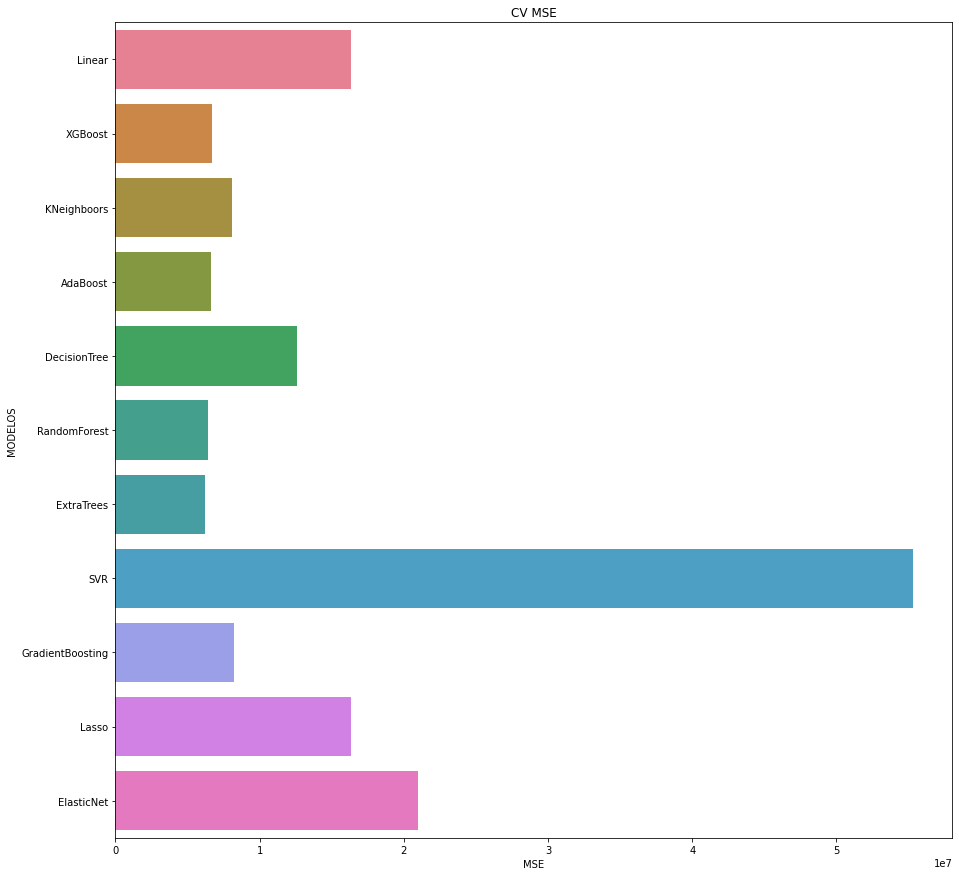

In [31]:
K_fold = StratifiedKFold(n_splits=10)

resultados_cv_MSE_PCA = [] # resultado cross validation 
media_cv_MSE_PCA = [] # valor de la media de cross validation
std_cv_PCA = [] # std cross validation 


for model in ls.lista_modelos :
    resultados_cv_MSE_PCA.append(cross_val_score(model, X_pca_df, y, 
            scoring = "neg_mean_squared_error", cv = K_fold, n_jobs=-1))

for resultado in resultados_cv_MSE_PCA:
    media_cv_MSE_PCA.append(abs(resultado.mean()))
    std_cv_PCA.append(resultado.std())

tabla_resultados_pca = pd.DataFrame(
    {
        "MSE":media_cv_MSE_PCA,
        "STD": std_cv_PCA,
        "MODELOS":[
                     "Linear",
                     "XGBoost",
                     "KNeighboors",
                     "AdaBoost", 
                     "DecisionTree",   
                     "RandomForest",
                     "ExtraTrees",
                     "SVR",
                     "GradientBoosting",
                     "Lasso",
                     "ElasticNet"]
    },columns=['MSE','STD','MODELOS'])

print(tabla_resultados_pca.sort_values(by=['MSE'], ascending=True))
plt.figure(figsize=(15,15), facecolor='w')
plt.xlabel("Mean Squared Error")
plt.title("CV MSE")
sns.barplot("MSE","MODELOS", data = tabla_resultados_pca,
                palette="husl", orient = "h")

Las metricas obtidas con PCA son peores que las metricas sin transformación en los datos por lo que se rechaza esta opción a la hora de optimizar los modelos en el siguiente paso

# KMeans

Ahora se realiza la clusterización de los datos con el metodo KMeans

Se dibuja la gráfica con la inertia de cada numero de clusters para buscar el codo que permita identifacar el número de cluster más adecuado.

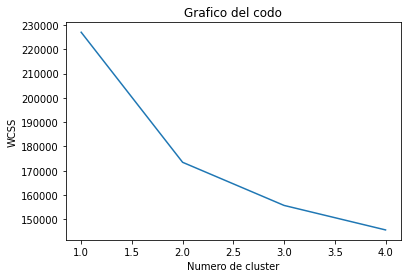

In [32]:
wcss = []
for i in range(1,5):
    knn=KMeans(random_state=1234,n_clusters=i).fit(X_escalado)
    wcss.append(knn.inertia_)
#Plotting The Elbow graph
plt.plot(range(1, 5), wcss)
plt.title('Grafico del codo')
plt.xlabel('Numero de cluster')
plt.ylabel('WCSS')
plt.show()

En la gráfica se puede ver que 2 es el número de cluster más adecuado, por lo que se entrena y se predicen los resultados con 2 clusters

In [33]:
knn_2=KMeans(random_state=1234,n_clusters=2).fit(X_escalado)
cluster_kmeans = knn_2.predict(X_escalado)

X_km = X_escalado.copy()
X_km["Cluster"]=cluster_kmeans

Se guarda el archivo entrenado para utilizarlo más tarde

In [34]:
pickle.dump(knn_2, open('../model/knn_2.pkl', 'wb'))

In [35]:
X_km['Precio']=y

In [36]:
X_km

,numeric__Anyo,numeric__Kilometros,numeric__Potencia,text__Combustible_Diésel,text__Combustible_Eléctrico,text__Combustible_Gas licuado (GLP),text__Combustible_Gas natural (CNG),text__Combustible_Gasolina,text__Combustible_Híbrido,text__Combustible_Híbrido enchufable,...,text__Cluster_Modelo_coupe_pequeno,text__Cluster_Modelo_furgon_pasajero,text__Cluster_Modelo_furgon_trabajo,text__Cluster_Modelo_otro,text__Cluster_Modelo_sedan_grande,text__Cluster_Modelo_sedan_pequeno,text__Cluster_Modelo_suv_grande,text__Cluster_Modelo_suv_pequeno,Cluster,Precio
0,0.559955,-0.240022,-0.350811,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,14490
1,-1.654176,0.094079,-1.071417,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1800
2,0.876260,-0.981926,2.115881,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,22800
3,-0.230806,-0.916977,1.533853,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,25900
4,0.718107,-0.773070,1.811009,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,29418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35664,-0.863415,0.869765,2.836488,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,10990
35665,1.034412,-1.112971,-0.239948,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,26000
35666,-3.077546,0.873447,-2.180043,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,350
35667,0.718107,-0.930523,-0.378526,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,13500


In [37]:
X_km.to_csv('../data/clean/Train_km.csv')

Se realizan los mismos pasos en los apartados anteriores, pero en este caso se entrará un modelo distinto por cada uno de los cluster que hemos creado

In [38]:
# Cross validate model with Kfold stratified cross val
K_fold = StratifiedKFold(n_splits=10)


# Modeling step Test differents algorithms

 # std cross validation 

for i in range(0,2):
    resultados_cv_MSE_KM = [] # resultado cross validation 
    media_cv_MSE_KM = [] # valor de la media de cross validation
    std_cv_KM = []
    for model in ls.lista_modelos :
        resultados_cv_MSE_KM.append(cross_val_score(
            model, X_km[X_km.Cluster == i].drop(columns=['Cluster','Precio']),
            X_km[X_km.Cluster==i]['Precio'], 
                scoring = "neg_mean_squared_error",
                cv = K_fold, n_jobs=-1))

    for resultado in resultados_cv_MSE_KM:
        media_cv_MSE_KM.append(abs(resultado.mean()))
        std_cv_KM.append(resultado.std())

    tabla_resultados_km = pd.DataFrame(
        {
            "MSE":media_cv_MSE_KM,
            "STD": std_cv_KM,
            "MODELOS":[
                        "Linear",
                        "XGBoost",
                        "KNeighboors",
                        "AdaBoost", 
                        "DecisionTree",   
                        "RandomForest",
                        "ExtraTrees",
                        "SVR",
                        "GradientBoosting",
                        "Lasso",
                        "ElasticNet"]
        },columns=['MSE','STD','MODELOS'])
    print(f'Cluster_{i}')
    print(tabla_resultados_km.sort_values(by=['MSE'], ascending=True))

Cluster_0
             MSE            STD           MODELOS
1   6.132375e+06  437436.087910           XGBoost
5   6.187952e+06  428482.475665      RandomForest
3   6.325964e+06  378669.440980          AdaBoost
6   6.360937e+06  459426.851600        ExtraTrees
8   7.978180e+06  406173.993053  GradientBoosting
2   1.084356e+07  547046.343894       KNeighboors
9   1.089787e+07  507464.658198             Lasso
0   1.097318e+07  521988.547179            Linear
4   1.119662e+07  707924.935010      DecisionTree
10  2.274394e+07  646427.433116        ElasticNet
7   5.300432e+07  919029.747725               SVR
Cluster_1
             MSE           STD           MODELOS
1   4.416016e+06  7.653499e+05           XGBoost
3   4.807788e+06  9.133198e+05          AdaBoost
5   4.826663e+06  7.872620e+05      RandomForest
8   4.973680e+06  8.938859e+05  GradientBoosting
6   5.062681e+06  7.460025e+05        ExtraTrees
2   6.347387e+06  7.621233e+05       KNeighboors
9   7.303635e+06  8.574295e+05       

En la tabla se puede ver que los modelos `XGBoost, AsaBoost y RandomForest` son los que mejor metrica tienen, estos modelos se emplearán en la optimización de parametros que se hará en el siguiente paso